# Flower Classification / Recognition using Convolution Neural Network 

### We employ a Convolutional Neural Network to address a Supervised Image Classification problem. Various flower types included in the dataset are rose, chamomile, dandelion, sunflower, and tulip. We use OpenCV and TensorFlow for Image Preprocessing and Model Development.

Importing important modules such Pandas, Numpy, matplotlib & TensorFlow

In [7]:
import numpy as np  
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt 
from PIL import Image 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf 
import os

Importing the Dataset of Flower Images

In [12]:
base_dir = 'flowers/'
  
img_size = 224
batch = 64

Data Augmentation and creating training and test datasets

In [13]:
# Create a data augmentor 
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,  zoom_range=0.2, 
                                   horizontal_flip=True, validation_split=0.2) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2) 
  
# Create datasets 
train_datagen = train_datagen.flow_from_directory(base_dir, target_size=
                                                  ( img_size, img_size), subset='training', batch_size=batch)

test_datagen = test_datagen.flow_from_directory(base_dir, target_size=
                                                  ( img_size, img_size), subset='validation', batch_size=batch) 

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


#### Model Development using TensorFlow

TensorFlow is used to create CNN Model which is trained on the dataset.

In [14]:
# # modelling starts using a CNN. 
  
model = Sequential() 
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(224, 224, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
model.add(Flatten())

model.add(Dense(512))

model.add(Activation('relu')) 

model.add(Dense(5, activation="softmax")) 

#### Summary and Output of the model

In [16]:
model.summary()

import keras
keras.utils.plot_model( model, 
    show_shapes = True, 
    show_dtype = True, 
    show_layer_activations = True
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 64)      

#### Compilation and Model Fitting

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy']) 

model.fit(train_datagen,epochs=30,validation_data=test_datagen)

Epoch 1/30
55/55 [==============================] - 501s 9s/step - loss: 1.3732 - accuracy: 0.3795 - val_loss: 1.1774 - val_accuracy: 0.4802
Epoch 2/30
55/55 [==============================] - 531s 10s/step - loss: 1.1392 - accuracy: 0.5291 - val_loss: 1.0610 - val_accuracy: 0.6047
Epoch 3/30
55/55 [==============================] - 562s 10s/step - loss: 1.0673 - accuracy: 0.5678 - val_loss: 1.1148 - val_accuracy: 0.5291
Epoch 4/30
55/55 [==============================] - 502s 9s/step - loss: 0.9641 - accuracy: 0.6268 - val_loss: 0.9519 - val_accuracy: 0.6267
Epoch 5/30
55/55 [==============================] - 542s 10s/step - loss: 0.9018 - accuracy: 0.6526 - val_loss: 0.9624 - val_accuracy: 0.6384
Epoch 6/30
55/55 [==============================] - 505s 9s/step - loss: 0.8757 - accuracy: 0.6694 - val_loss: 1.0656 - val_accuracy: 0.5930
Epoch 7/30
55/55 [==============================] - 549s 10s/step - loss: 0.9096 - accuracy: 0.6549 - val_loss: 0.9162 - val_accuracy: 0.6395
Epoch 8/3

### Saving & Loading the Model

In [18]:
from tensorflow.keras.models import load_model 
model.save('Model.h5') 
   
# load model 
savedModel=load_model('Model.h5')

### Testing the model on few test images

1/1 [==============================] - 0s 237ms/step
[[1. 0. 0. 0. 0.]]
Daisy


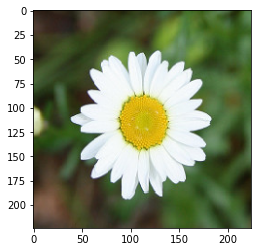

In [21]:
#from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
  
# using user-friendly indices
train_datagen.class_indices
    
#Creating list for mapping 
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip'] 
  
#Input image 
test_image = image.load_img('img1.jpg',target_size=(224,224)) 
  
#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 
  
# Result array 
result = savedModel.predict(test_image) 
print(result) 
  
#Mapping result array with the main name list 
i=0
for i in range(len(result[0])): 
  if(result[0][i]==1): 
    print(list_[i]) 
    break

1/1 [==============================] - 0s 60ms/step
[[0. 0. 0. 1. 0.]]
sunflower


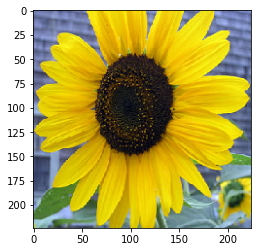

In [22]:
#Input image 
test_image = image.load_img('img2.jpg',target_size=(224,224)) 
  
#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 
  
# Result array 
result = savedModel.predict(test_image) 
print(result) 
  
#Mapping result array with the main name list 
i=0
for i in range(len(result[0])): 
  if(result[0][i]==1): 
    print(list_[i]) 
    break